## Import + Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/training.csv")
test = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/test.csv")
sample_submission = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv")

In [3]:
#all columns linked to geo-demographic
train.columns[13:82]
geo_demo_list = train.columns[13:82].tolist()
geo_demo_list

['Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_

In [4]:
df_hosp = pd.read_csv("/kaggle/input/us-hospital-and-physician-by-zipcode/us_hospital_locations.csv")
df_phys = pd.read_csv("/kaggle/input/us-hospital-and-physician-by-zipcode/National_Downloadable_File_2018.csv")

## Data Pre-processing

In [5]:
# Filter dataframe to include only rows where STATUS is 'OPEN'
df_open = df_hosp[df_hosp['STATUS'] == 'OPEN']

# Extract the first 3 digits of ZIP
df_open['patient_zip3'] = df_open['ZIP'].astype(str).str[:3]

# Group by the first 3 digits of ZIP and count the number of hospitals in each group
hospital_counts_by_zip3 = df_open.groupby('patient_zip3').size().reset_index(name='Hospital_Count')

hospital_counts_by_zip3

,patient_zip3,Hospital_Count
0,100,26
1,103,5
2,104,15
3,105,13
4,106,6
...,...,...
821,995,14
822,996,6
823,997,6
824,998,4


In [6]:
# Filter dataframe to include only rows where pri_spec contains 'oncology'
df_oncology = df_phys[df_phys[' pri_spec'].str.contains('oncology', case=False, na=False)]

# Extract the first 3 digits of ZIP
df_oncology['patient_zip3'] = df_oncology[' zip'].astype(str).str[:3]

# Group by the first 3 digits of ZIP and count the number of physicians in each group
physician_counts_by_zip3 = df_oncology.groupby('patient_zip3').size().reset_index(name='Physician_Count')

physician_counts_by_zip3

,patient_zip3,Physician_Count
0,006,16
1,007,11
2,008,1
3,009,14
4,010,2
...,...,...
854,995,71
855,996,18
856,997,6
857,998,4


In [7]:
# Convert 'ZIP_3' column to integers in physician_counts_by_zip3 DataFrame
physician_counts_by_zip3['patient_zip3'] = physician_counts_by_zip3['patient_zip3'].astype(int)

# Convert 'ZIP_3' column to integers in hospital_counts_by_zip3 DataFrame
hospital_counts_by_zip3['patient_zip3'] = hospital_counts_by_zip3['patient_zip3'].astype(int)

In [8]:
# Merge hospital_counts_by_zip3 with train data on 'patient_zip3'
train = train.merge(hospital_counts_by_zip3[['patient_zip3', 'Hospital_Count']], on='patient_zip3', how='left')

# Merge physician_counts_by_zip3 with train data on 'patient_zip3'
train = train.merge(physician_counts_by_zip3[['patient_zip3', 'Physician_Count']], on='patient_zip3', how='left')

In [9]:
train['Hospital_Count'] = train['Hospital_Count'].fillna(0)
train['Physician_Count'] = train['Physician_Count'].fillna(0)

In [10]:
# Merge hospital_counts_by_zip3 with train data on 'patient_zip3'
test = test.merge(hospital_counts_by_zip3[['patient_zip3', 'Hospital_Count']], on='patient_zip3', how='left')
# physician_counts_by_zip3 with train data on 'patient_zip3'
test = test.merge(physician_counts_by_zip3[['patient_zip3', 'Physician_Count']], on='patient_zip3', how='left')

In [11]:
test['Hospital_Count'] = test['Hospital_Count'].fillna(0)
test['Physician_Count'] = test['Physician_Count'].fillna(0)

In [12]:
train.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [13]:
#Categorical Columns
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


## Feature Engineering

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 85 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [15]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('DiagPeriodL90D')

In [16]:
categorical_cols

Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

In [17]:
numerical_cols

Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
     

In [18]:
cols = ['breast_cancer_diagnosis_code',
        'metastatic_cancer_diagnosis_code',
        'patient_zip3',
        'patient_age',
        'payer_type',
        'patient_state',
        'breast_cancer_diagnosis_desc']

## Assembling the pipeline

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [20]:
named_preprocessing_pipeline = Pipeline([
      
    ('prep', ColumnTransformer([
        ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
         cols),
         ],
        remainder='passthrough').set_output(transform='pandas')),
    ])

named_preprocessing_pipeline  

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['breast_cancer_diagnosis_code',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'patient_zip3',
                                                   'patient_age', 'payer_type',
                                                   'patient_state',
                                                   'breast_cancer_diagnosis_desc'])]))])

In [21]:
X = train[cols+['DiagPeriodL90D']].drop(columns=['DiagPeriodL90D'], axis=1)
y = train['DiagPeriodL90D']

In [22]:
X.head()

,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,patient_zip3,patient_age,payer_type,patient_state,breast_cancer_diagnosis_desc
0,C50919,C7989,924,84,MEDICAID,CA,Malignant neoplasm of unsp site of unspecified...
1,C50411,C773,928,62,COMMERCIAL,CA,Malig neoplm of upper-outer quadrant of right ...
2,C50112,C773,760,43,COMMERCIAL,TX,Malignant neoplasm of central portion of left ...
3,C50212,C773,926,45,COMMERCIAL,CA,Malig neoplasm of upper-inner quadrant of left...
4,1749,C773,836,55,COMMERCIAL,ID,"Malignant neoplasm of breast (female), unspeci..."


In [23]:
#checking output on train df
df_train = named_preprocessing_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   encode__breast_cancer_diagnosis_code      12906 non-null  float64
 1   encode__metastatic_cancer_diagnosis_code  12906 non-null  float64
 2   encode__patient_zip3                      12906 non-null  float64
 3   encode__patient_age                       12906 non-null  float64
 4   encode__payer_type                        11103 non-null  float64
 5   encode__patient_state                     12855 non-null  float64
 6   encode__breast_cancer_diagnosis_desc      12906 non-null  float64
dtypes: float64(7)
memory usage: 705.9 KB


In [24]:
#checking output on test df
df_test = pd.DataFrame(named_preprocessing_pipeline.transform(test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   encode__breast_cancer_diagnosis_code      5792 non-null   float64
 1   encode__metastatic_cancer_diagnosis_code  5792 non-null   float64
 2   encode__patient_zip3                      5792 non-null   float64
 3   encode__patient_age                       5792 non-null   float64
 4   encode__payer_type                        5032 non-null   float64
 5   encode__patient_state                     5771 non-null   float64
 6   encode__breast_cancer_diagnosis_desc      5792 non-null   float64
dtypes: float64(7)
memory usage: 316.9 KB


## Modelling

In [25]:
#catboost library
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline

In [26]:
catboost_params_optuna = {'depth':2,
                          #'l2_leaf_reg': 0.0687356140243106,
                          'learning_rate':0.03,
                          #'colsample_bylevel': 0.7017148360901887,
                          #'subsample': 0.814719415526711,
                          'random_seed': 42,
                          'eval_metric': 'AUC',
                          'verbose': False,
                          'loss_function': 'Logloss',
                          'iterations':1000
                         }

# catboost model
cb_model = CatBoostClassifier(**catboost_params_optuna)


cb_pipeline = make_pipeline(named_preprocessing_pipeline, cb_model)
cb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['breast_cancer_diagnosis_code',
                                                                    'metastatic_cancer_diagnosis_code',
                                                                    'patient_zip3',
                                                                    'patient_age',
                                                                    'payer_type',
                                                                    'patient_state',
                                                                    'breast_cancer_diagnosis_desc'])]))])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7ccd54227eb0>)])

In [27]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

# Number of folds
n_splits = 10

# Adjusting parameters of StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation results
cv_results = []

# Stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    cb_pipeline.fit(X_train, y_train)

    # Predictions on the validation set
    y_val_pred_prob = cb_pipeline.predict_proba(X_val)[:, 1]  # Predict probabilities for class 1
    y_pred = cb_pipeline.predict(X_val)
        
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-' * 70)

    # Results
    cv_results.append(roc_auc)

# Average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')

Fold 1, AUC Score on Validation Set: 0.8238354096850938
Fold 1, F1 Score on Validation Set: 0.7947383469288611
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.8086170729835512
Fold 2, F1 Score on Validation Set: 0.7939090320329241
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.7955961730321557
Fold 3, F1 Score on Validation Set: 0.8042391538132602
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.8157670563556828
Fold 4, F1 Score on Validation Set: 0.8035120297343195
----------------------------------------------------------------------
Fold 5, AUC Score on Validation Set: 0.7891100253255225
Fold 5, F1 Score on Validation Set: 0.7934837164530911
----------------------------------------------------------------------
Fold 6, AUC Score on Validation Set: 0.8140569440536185
Fold 6, F1 Score on Validation Set

## Submission

In [28]:
# Fit the ensemble final model
cb_pipeline.fit(X, y)

# Create submission file with probability predictions
predictions = cb_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_baseline.csv', index=False)

In [29]:
sample_submission.head(10)

,patient_id,DiagPeriodL90D
0,573710,0.788720
1,593679,0.789375
2,184532,0.777168
3,447383,0.803721
4,687972,0.824180
5,281312,0.105055
6,492714,0.897991
7,378266,0.866193
8,291550,0.752232
9,612272,0.803208


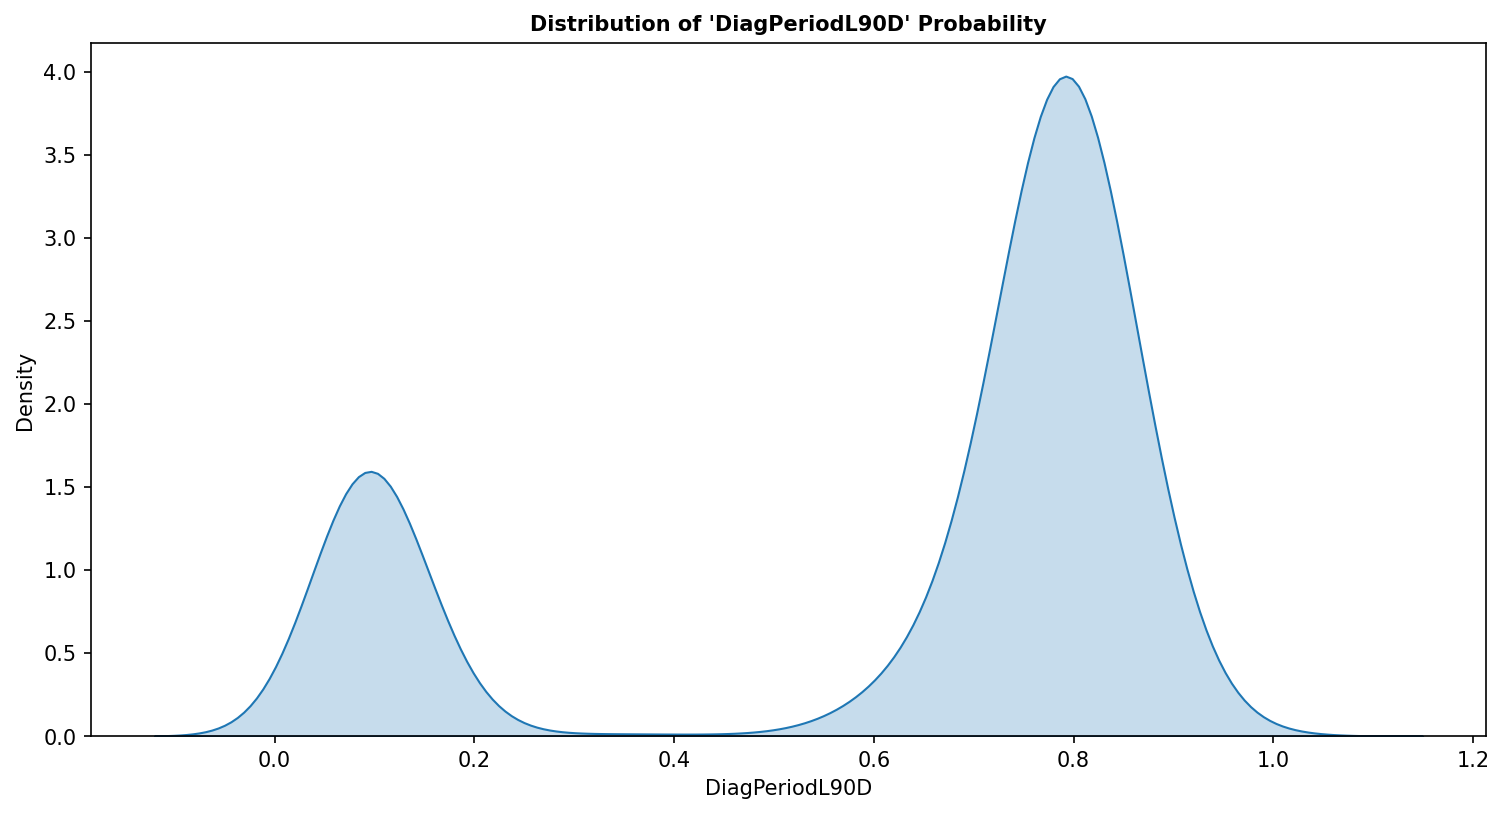

In [30]:
plt.figure(figsize = (12, 6), dpi = 150)
sns.kdeplot(sample_submission.DiagPeriodL90D, fill = True)
plt.title("Distribution of 'DiagPeriodL90D' Probability", weight = 'bold', size = 10)
plt.show()